<a href="https://colab.research.google.com/github/majdzarai/terespo/blob/main/potatoesPFE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [46]:
import tensorflow as tf 
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras import models, layers

In [2]:
IMAGE_SIZE = 256
BATCH_SIZE = 32

In [3]:
dataset = tf.keras.preprocessing.image_dataset_from_directory(
    "/content/drive/MyDrive/plants",
    shuffle = True,
    image_size = (IMAGE_SIZE,IMAGE_SIZE),
    batch_size = BATCH_SIZE,
)

Found 2152 files belonging to 3 classes.


In [4]:
for image_batch, label_batch in dataset.take(1):
  print(image_batch.shape)
  print(label_batch.numpy())

(32, 256, 256, 3)
[0 0 1 0 0 0 0 1 0 0 1 0 1 1 0 1 0 0 1 0 1 2 1 0 0 0 0 0 1 0 1 0]


In [5]:
classes = dataset.class_names
classes

['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']

In [6]:
for image_batch,label_batch in dataset.take(1):
  print(image_batch[0])

tf.Tensor(
[[[207. 211. 223.]
  [208. 212. 224.]
  [218. 222. 234.]
  ...
  [157. 162. 184.]
  [150. 155. 177.]
  [160. 165. 187.]]

 [[200. 204. 216.]
  [200. 204. 216.]
  [208. 212. 224.]
  ...
  [154. 159. 181.]
  [147. 152. 174.]
  [152. 157. 179.]]

 [[203. 207. 219.]
  [201. 205. 217.]
  [204. 208. 220.]
  ...
  [157. 162. 184.]
  [152. 157. 179.]
  [151. 156. 178.]]

 ...

 [[142. 144. 157.]
  [124. 126. 139.]
  [147. 149. 162.]
  ...
  [112. 113. 133.]
  [ 83.  84. 104.]
  [ 98.  99. 119.]]

 [[128. 130. 143.]
  [149. 151. 164.]
  [154. 156. 169.]
  ...
  [143. 144. 164.]
  [106. 107. 127.]
  [119. 120. 140.]]

 [[132. 134. 147.]
  [128. 130. 143.]
  [121. 123. 136.]
  ...
  [174. 175. 195.]
  [112. 113. 133.]
  [146. 147. 167.]]], shape=(256, 256, 3), dtype=float32)


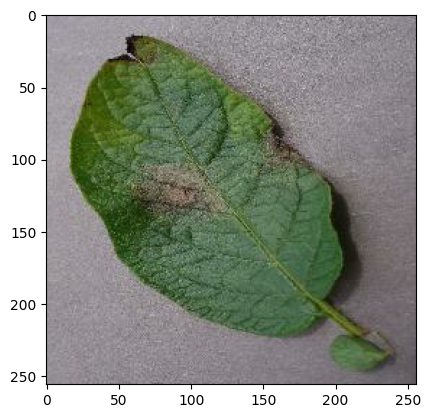

In [7]:
for image_batch,label_batch in dataset.take(1):
  plt.imshow(image_batch[0].numpy().astype("uint8"))

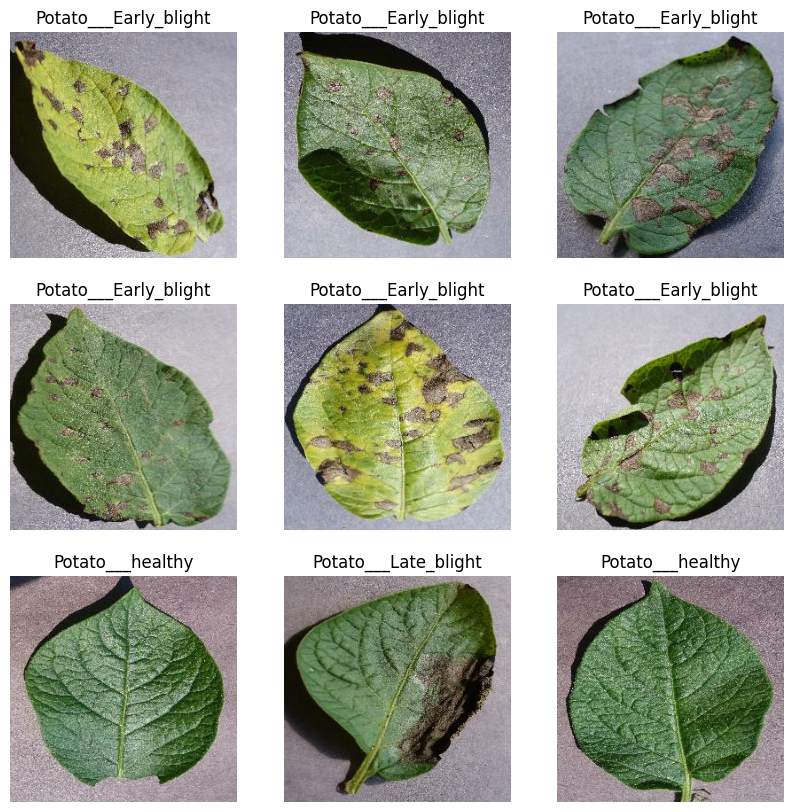

In [8]:
plt.figure(figsize=(10,10))
for image_batch,label_batch in dataset.take(1):
  for i in range (9):
    x = plt.subplot(3, 3, i+1)
    plt.imshow(image_batch[i].numpy().astype("uint8"))
    plt.title(classes[label_batch[i]])
    plt.axis("off")


In [9]:
len(dataset)

68

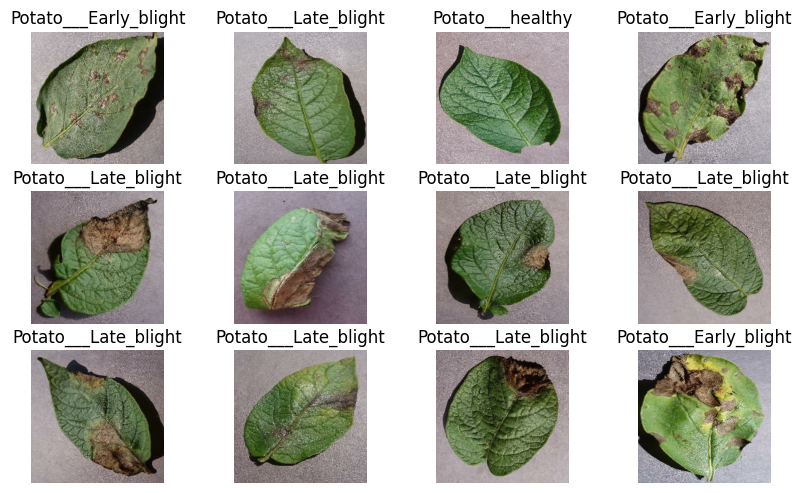

In [38]:
plt.figure(figsize=(10,10))
for image_batch,label_batch in dataset.take(2):
  for i in range (12):
    x = plt.subplot(5, 4, i+1)
    plt.imshow(image_batch[i].numpy().astype("uint8"))
    plt.title(classes[label_batch[i]])
    plt.axis("off")

In [10]:
epoches = 50

In [31]:
def splitting (ds, train_split = 0.8, validation_split=0.1, test_split=0.1, shuffle=True, shuffle_size=10000):
    if shuffle:
     ds=ds.shuffle(shuffle_size, seed=5)
    ds_size = len(dataset)
    train_size = int(train_split * ds_size)
    val_size = int(validation_split * ds_size)
    train_ds = dataset.take(train_size)
    val_ds= dataset.skip(train_size).take(val_size)
    test_ds = dataset.skip(train_size).skip(val_size)
    return train_ds, val_ds, test_ds 


In [32]:
train_ds, val_ds, test_ds = splitting(dataset)

In [33]:
len(train_ds)

54

In [34]:
len(val_ds)

6

In [35]:
len(test_ds)

8

In [47]:
tf.keras.Sequential([
    layers.experimental.preprocessing.Resizing(IMAGE_SIZE,IMAGE_SIZE),
    layers.experimental.preprocessing.Rescaling(1.0/255)
    
])